<a href="https://colab.research.google.com/github/journalWheat/CSI4106-Project1-JaredWagner-WineClassification/blob/main/CSI4106_Project1_JaredWagner_WineQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predicting wine quality with naive bayes, logistic regression, and multi-layer perceptron**

# AUTHOR ATTRIBUTION
Intellectual property of JARED WAGNER, Fall 2022.

Submitted for CSI4106, Introduction to Artificial Intelligence. 

Student #300010832

# Introduction and goals
The goal is to....

Because... this has applications in ...

examples...

In [26]:
# setup for the project
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

wine_df = pd.read_csv('https://raw.githubusercontent.com/journalWheat/CSI4106-Project1-JaredWagner-WineClassification/main/WineQT.csv')
wine_df.drop('Id', inplace=True, axis=1)
# wine_df = water_df.dropna() # is this a good choice? ... hmmm...

# Analyzing the data

The dataset used for this report was provided through Kaggle: https://www.kaggle.com/datasets/yasserh/wine-quality-dataset

This dataset has 1143 samples and 11 features. From the data sample, I will be developing models to predict the rating of a given wine. This is a multinomial classification task, where wine can be rated 3-8.

From the statistics below, there are no rows with missing values in this data set (since the count for each feature is equal to the count of the target).

In [27]:
# get some statistics
print(wine_df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000         

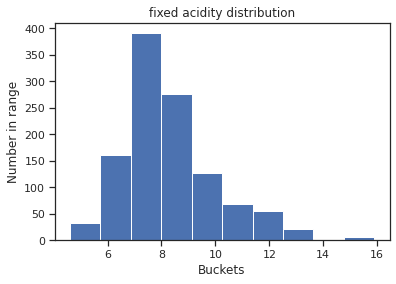

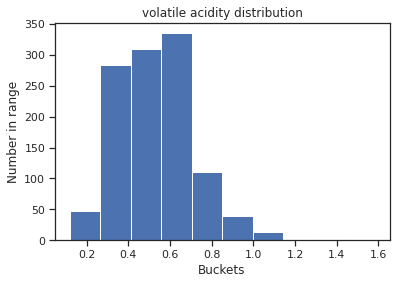

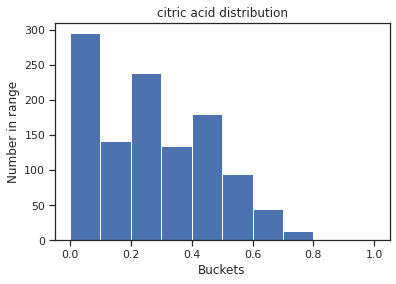

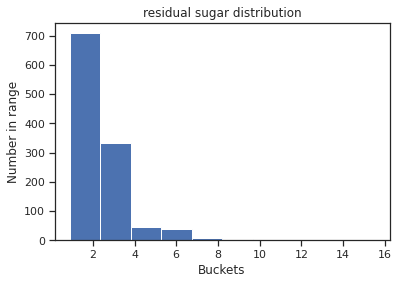

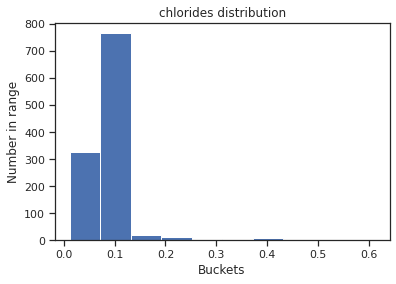

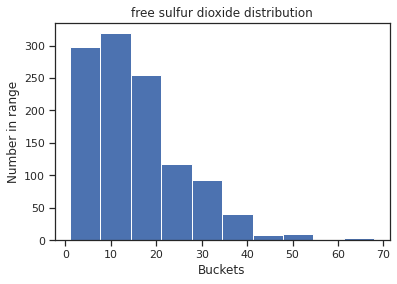

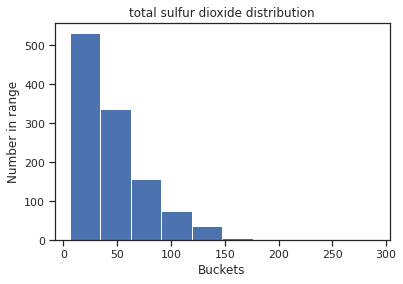

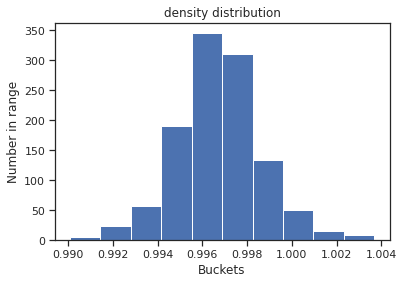

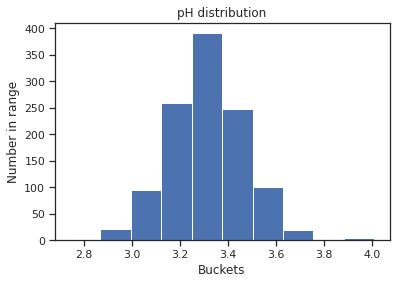

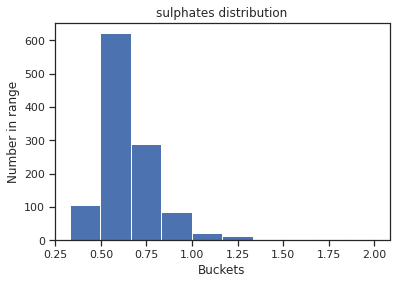

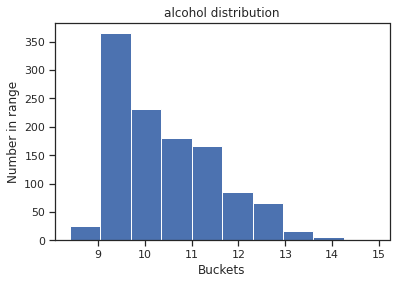

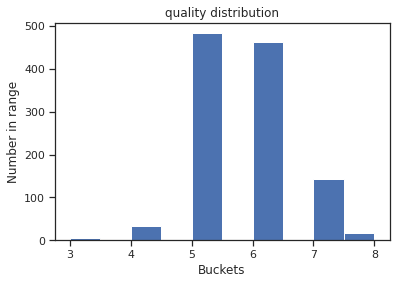

In [28]:
# plot histograms to see distributions of data
for column in wine_df:
  plt.hist(wine_df[column])
  plt.xlabel('Buckets')
  plt.ylabel('Number in range')
  plt.title(column + ' distribution')
  plt.show()

One plot in particular stands out to me, which is the plot for the target value. The vast majority of samples have a quality score of 5 or 6. Wines of score 3, 4, 7, and 8 are comparitively much lower. In fact, the sample size of wines with quality = 3 or 8 are miniscule.

To reflect the uncertainy in the data, I assign new categories for wine quality:
- 3,4 -> bad
- 5 -> below average
- 6 -> above average
- 7,8 -> good

and I display a new histogram showing how the bins change.

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  

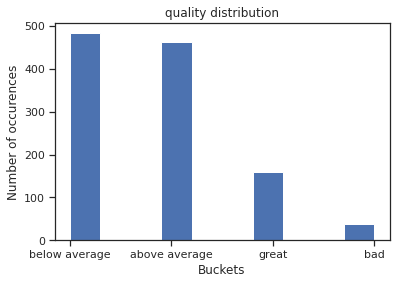

In [29]:
# assign new groupings for quality
wine_df['quality'].replace({3:'bad',4:'bad',5:'below average',6:'above average',7:'great',8:'great'}, inplace=True)

# display histogram
plt.hist(wine_df['quality'])
plt.xlabel('Buckets')
plt.ylabel('Number of occurences')
plt.title('quality distribution')
plt.show()

This seems like a more reasonable classification system for the wines, given the limited number of samples available.

# Feature engineering

Feature engineering is an important, but tricky, task. To help brainstorm about the features, the data is plotted using a Seaborn scatter matrix.

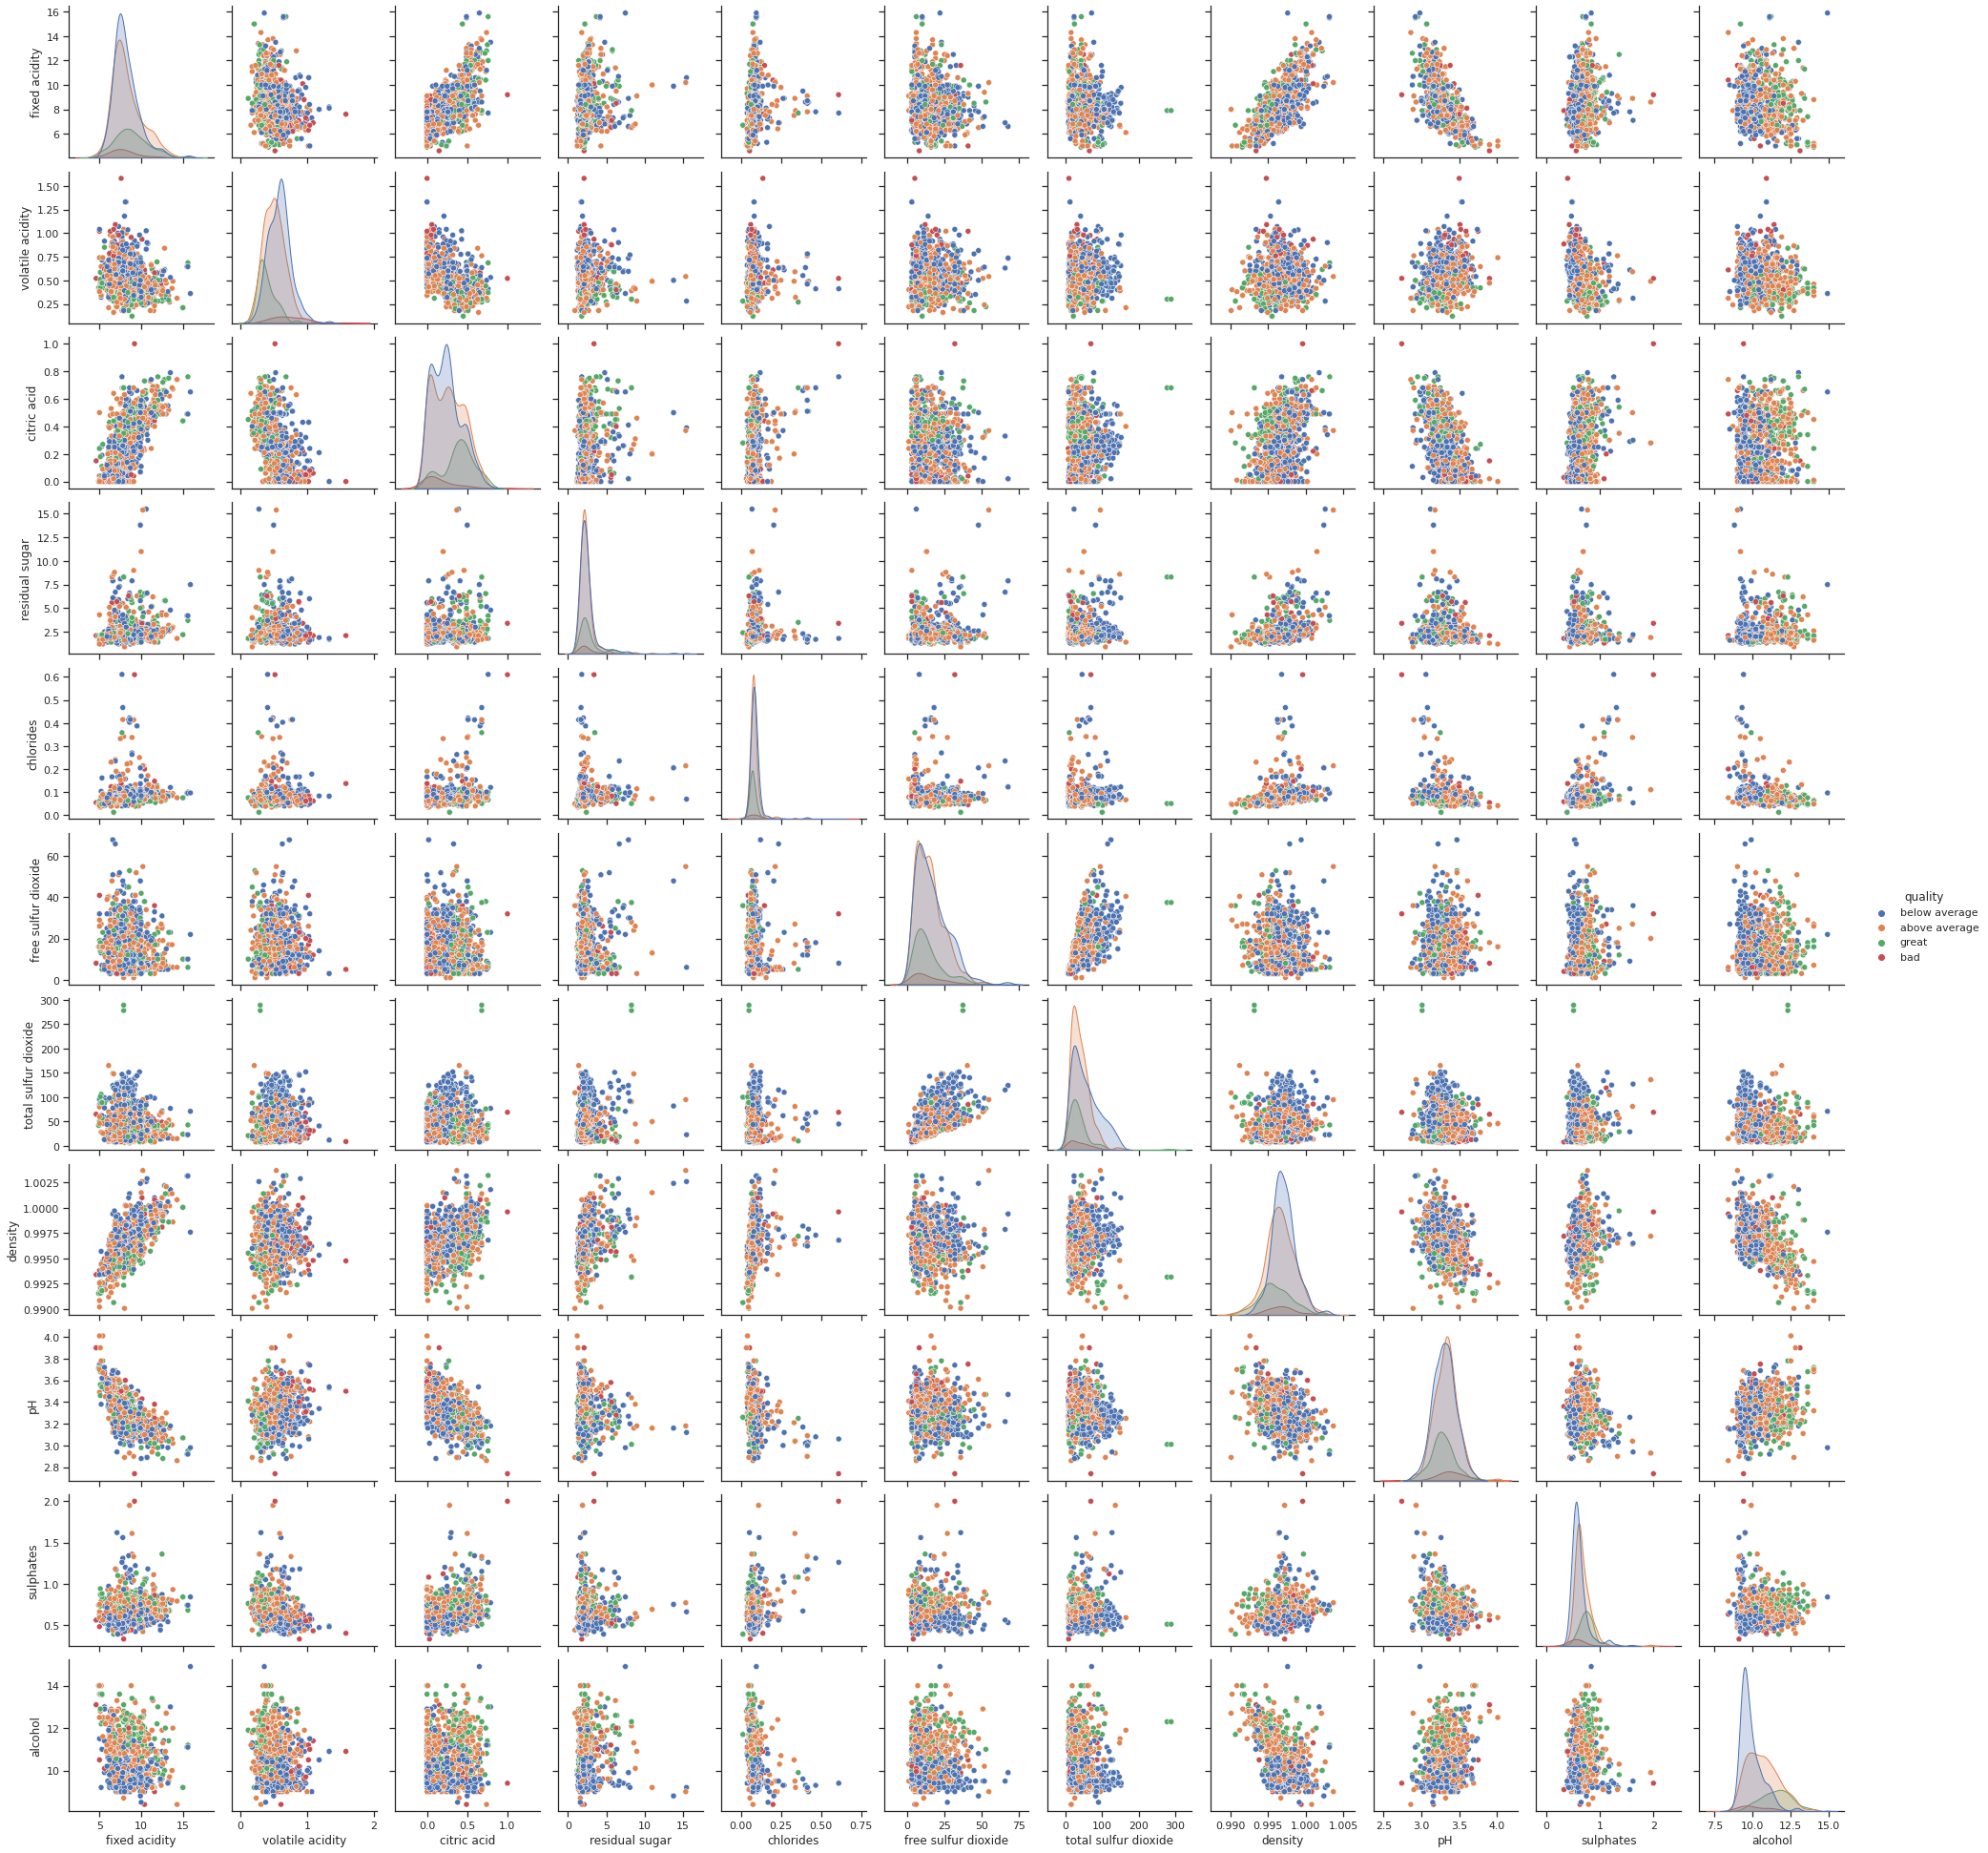

In [30]:
# plot scatter matrix
sns.set_theme(style='ticks')
sns.pairplot(wine_df,hue='quality')

__my thoughts on the plot?__

What other data would be useful? Consult Kaggle education.

# References

Kaggle feature engineering tutorials: https://www.kaggle.com/learn/feature-engineering

# DISCLOSURE

This is the third dataset I selected for this project. Since there may have been influence on this iteration by the work I did on my last two datasets, I have included references to the resources I used in the first iteration of this project under "Works Cited."

Iteration 1 is also available on Github: https://github.com/journalWheat/CSI4106Project1-JaredWagner

As well as iteration 2: 
https://github.com/journalWheat/CSI4106-Project1-JaredWagner-WaterPotability